In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import defaultdict
import cv2


from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

sys.path.append('..')

from dataset.artificial_dataset import ArtificialDatasetReader
from utils.metrics import mse, psnr
from models.baseline import Baseline
from models.neural_networks import MLP

In [3]:
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(0)

# Get Data

In [4]:
dr = ArtificialDatasetReader()

In [5]:
x_train, y_train, x_val, y_val, _, _ = dr.get_dataset(img_size=64)

In [6]:
x_train[0].shape, y_train[0].shape

((32, 32), (64, 64))

In [7]:
len(x_train)

1064

# MLP

In [8]:
model = MLP((32, 32), [512], learning_rate=0.0001, activ_hidden=tf.nn.tanh, activ_out=tf.nn.tanh)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [9]:
model.summary()

Model: "MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mean_absolute_error (MeanAbs multiple                  2         
_________________________________________________________________
dense_layer_0 (Dense)        multiple                  524800    
_________________________________________________________________
output_layer (Dense)         multiple                  2101248   
Total params: 2,626,050
Trainable params: 2,626,048
Non-trainable params: 2
_________________________________________________________________


## Train

In [10]:
result = model.train_epochs(x_train, y_train, x_val, y_val, 5, 64, frequency=1)

Mean PSNR 32.62757842289199
Epoch: 0 Train Loss: 0.049711380153894424 Validation Loss: 0.04826649650931358 Validation PSNR: 32.62757842289199
Mean PSNR 33.224405515193105
Epoch: 1 Train Loss: 0.04488278925418854 Validation Loss: 0.04537668824195862 Validation PSNR: 33.224405515193105
Mean PSNR 33.78194899315173
Epoch: 2 Train Loss: 0.04149384796619415 Validation Loss: 0.04299138858914375 Validation PSNR: 33.78194899315173
Mean PSNR 34.202290126703865
Epoch: 3 Train Loss: 0.038813114166259766 Validation Loss: 0.04096203297376633 Validation PSNR: 34.202290126703865
Mean PSNR 34.56260053734303
Epoch: 4 Train Loss: 0.03657340630888939 Validation Loss: 0.03918814659118652 Validation PSNR: 34.56260053734303
Mean PSNR 34.56260053734303
Epoch: 4 Train Loss: 0.03657340630888939 Validation Loss: 0.03918814659118652 Validation PSNR: 34.56260053734303


<AxesSubplot:>

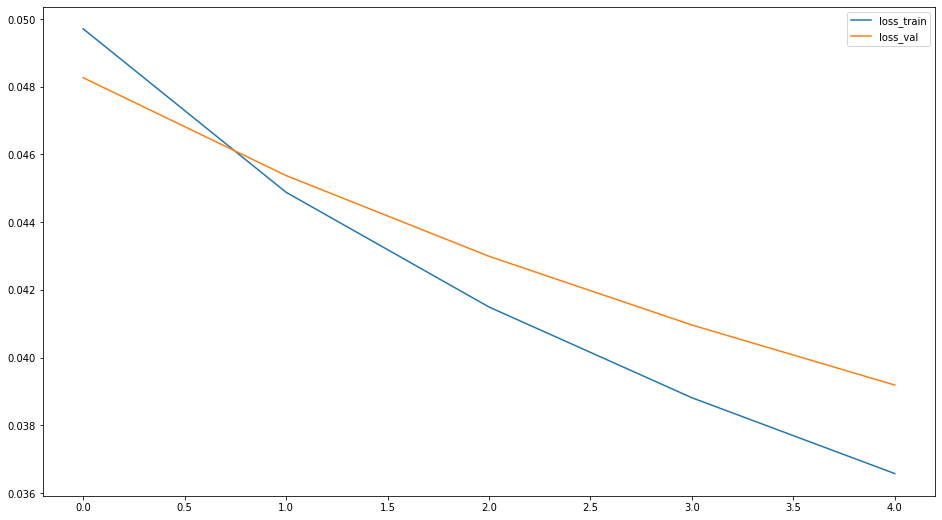

In [11]:
result.plot()

In [12]:
y = model(x_val)

In [13]:
_ = mse(y_val, y)
_ = psnr(y_val, y)

Mean MSE 0.00802514557593855
Mean PSNR 34.56260053734303


In [14]:
save_path = model.save_weights()

weights saved as ../_data/weights/MLP-a_512-hl_tanh-ol_tanh-ep_5.h5


In [15]:
model_2= MLP((32, 32), [512], learning_rate=0.0001, activ_hidden=tf.nn.tanh, activ_out=tf.nn.tanh)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [16]:
model_2.load_weights(save_path)

In [17]:
y = model(x_val)
_ = mse(y_val, y)
_ = psnr(y_val, y)

Mean MSE 0.00802514557593855
Mean PSNR 34.56260053734303


In [18]:
model_2.total_epochs

5